In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score

C:\Users\DELL\OneDrive\Documents\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\OneDrive\Documents\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\1991687158.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match = match[match['winner'] != 'Rising Pune Supergiant']
match = match[(match['team1'] != 'Rising Pune Supergiant') & (match['team2'] != 'Rising Pune Supergiant')]
delivery = delivery[(delivery['batting_team'] != 'Rising Pune Supergiant') & (delivery['bowling_team'] != 'Rising Pune Supergiant')]

In [4]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
match.shape

(740, 18)

In [6]:
print(match.isnull().sum())

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            621
dtype: int64


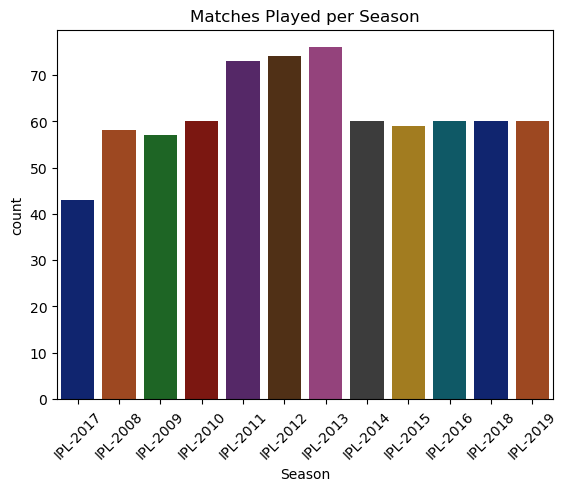

In [7]:
sns.countplot(x='Season', data=match, hue='Season',palette="dark")
plt.title('Matches Played per Season')
plt.xticks(rotation=45)
plt.show()

In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
delivery.shape

(175250, 21)

In [10]:
print(delivery.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    166619
dismissal_kind      166619
fielder             168940
dtype: int64


In [11]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [12]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [13]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,3,1,183
4,5,1,157
6,6,1,135
8,7,1,178
...,...,...,...
1486,11347,1,143
1488,11412,1,136
1490,11413,1,171
1492,11414,1,155


In [14]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [15]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
2,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
3,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,135
4,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
736,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
737,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
738,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


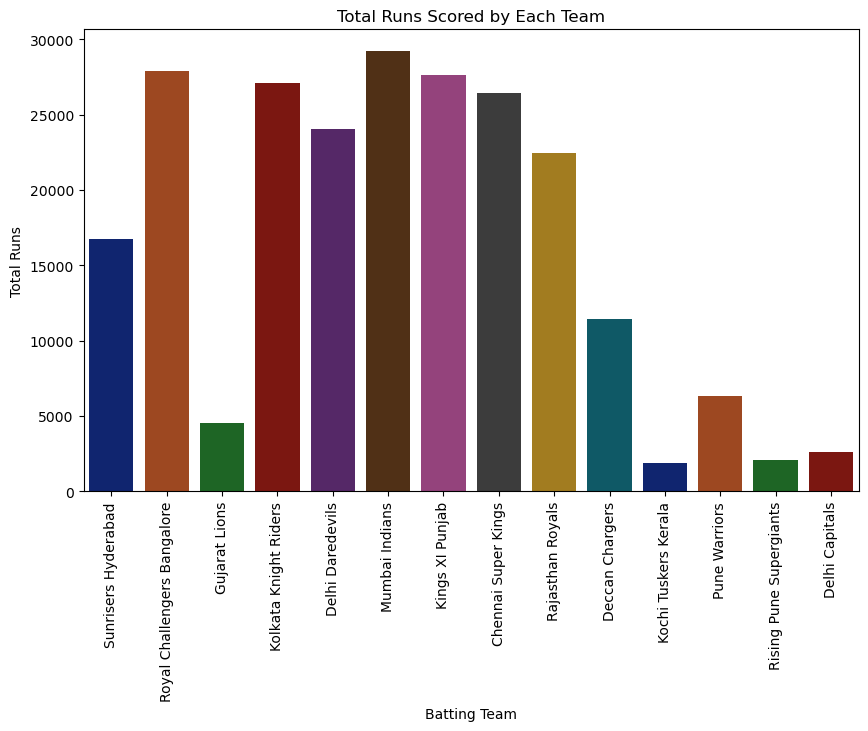

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='total_runs', data=delivery, estimator=sum, errorbar=None, hue='batting_team', legend=False, palette="dark")
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored by Each Team')
plt.xticks(rotation=90)
plt.show()

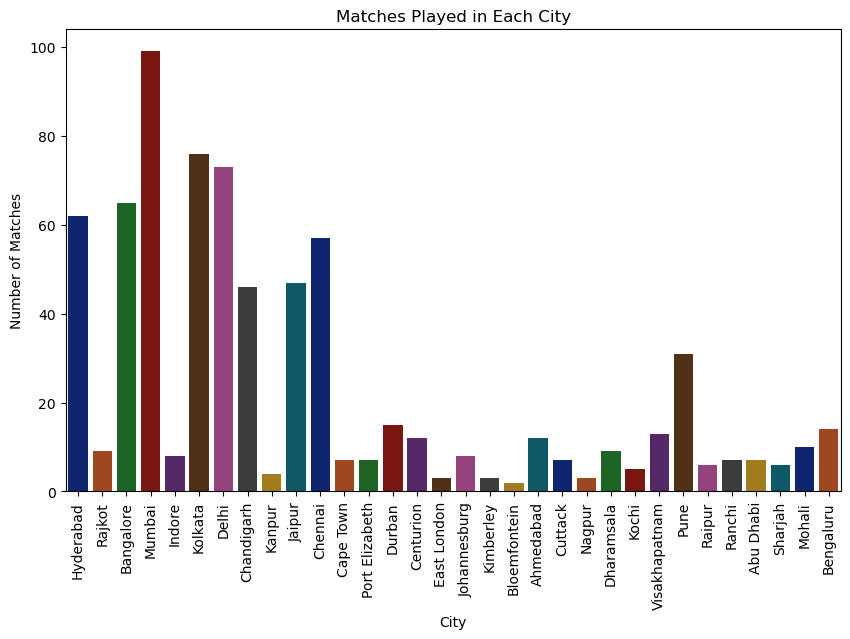

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=match_df,hue='city',palette="dark",legend=False)
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.title('Matches Played in Each City')
plt.xticks(rotation=90)
plt.show()

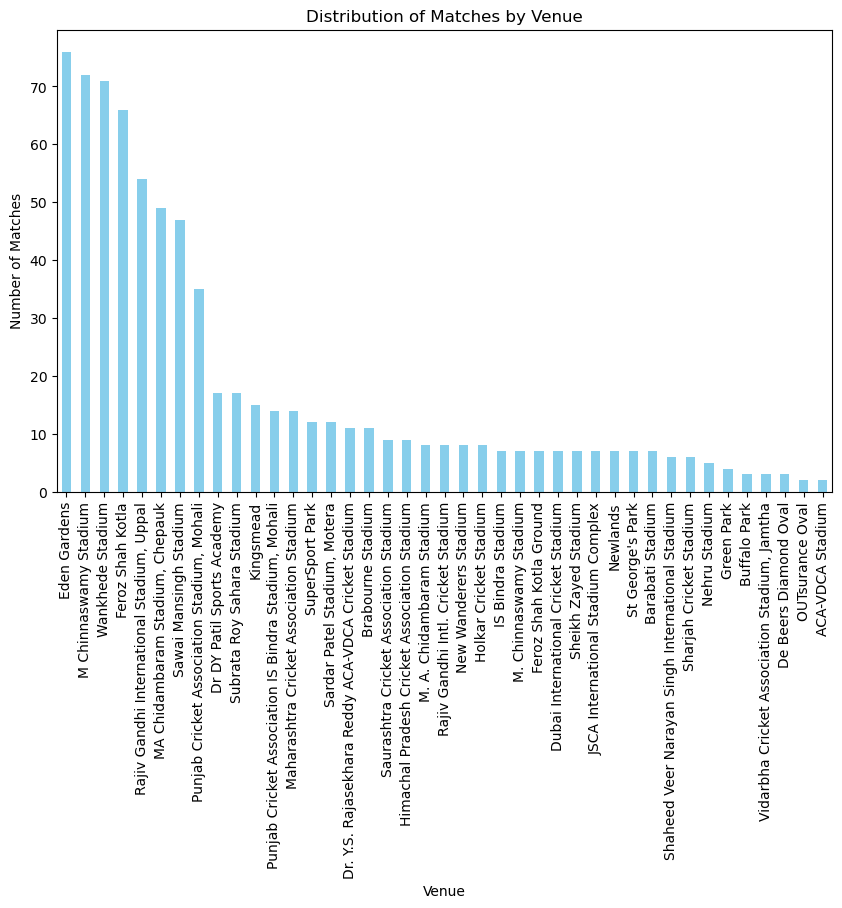

In [18]:
plt.figure(figsize=(10, 6))
match['venue'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Matches by Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()


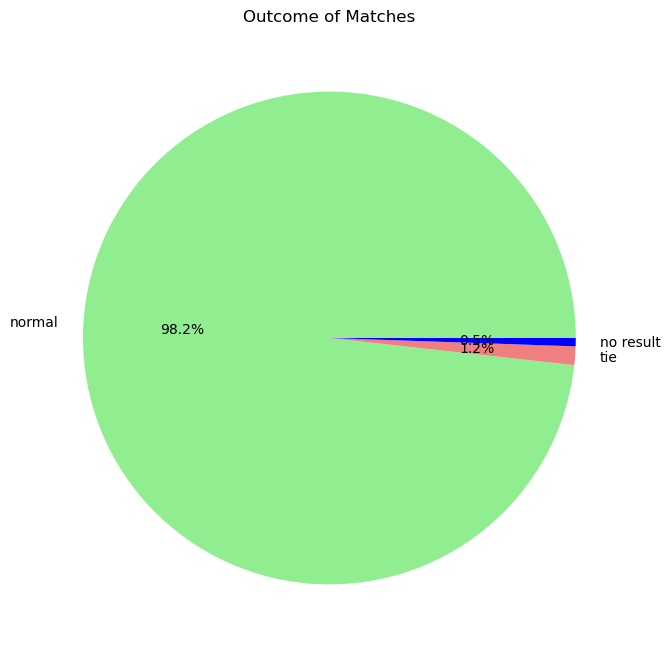

In [19]:
plt.figure(figsize=(8, 8))
match['result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral','blue'])
plt.title('Outcome of Matches')
plt.ylabel('')
plt.show()

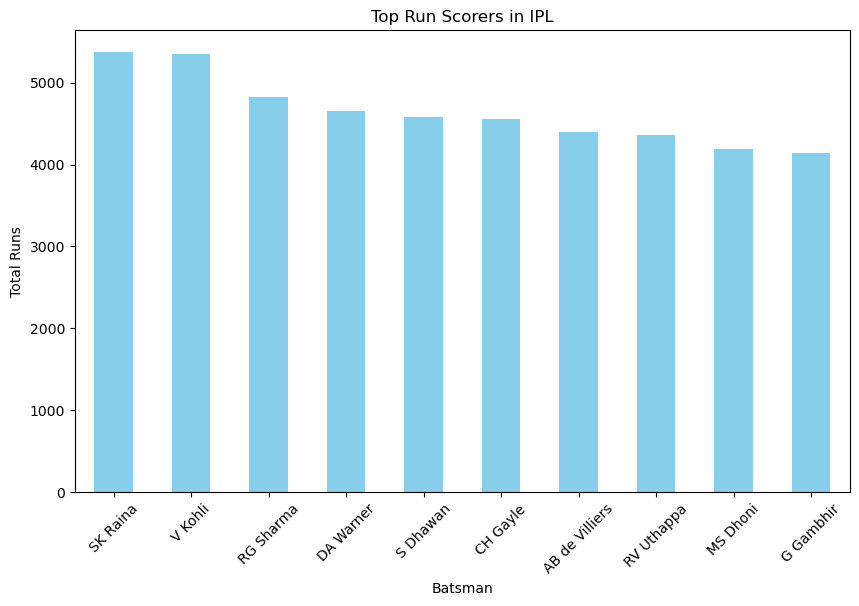

In [20]:
top_run_scorers = delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_run_scorers.plot(kind='bar', color='skyblue')
plt.title('Top Run Scorers in IPL')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

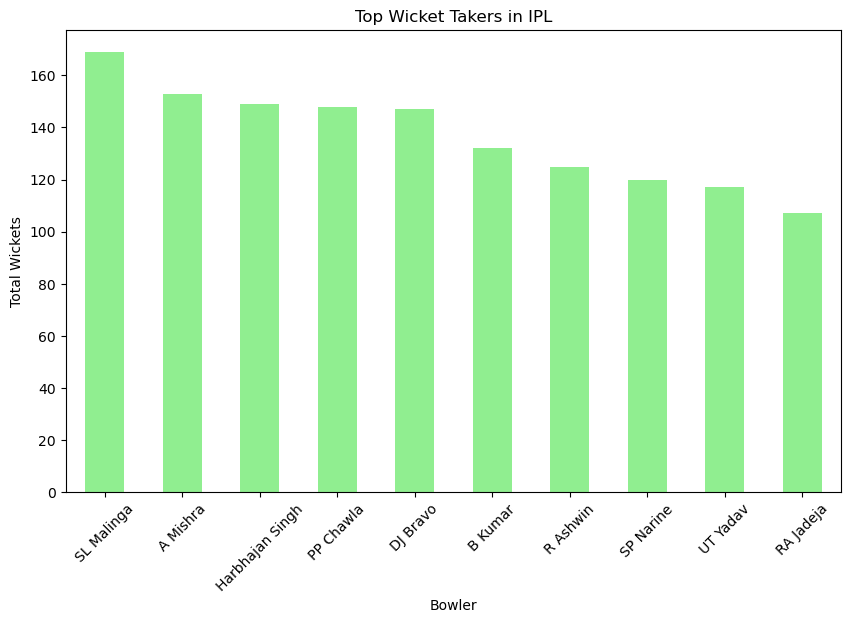

In [21]:
top_wicket_takers = delivery[delivery['dismissal_kind'] != 'run out'].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_wicket_takers.plot(kind='bar', color='lightgreen')
plt.title('Top Wicket Takers in IPL')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()


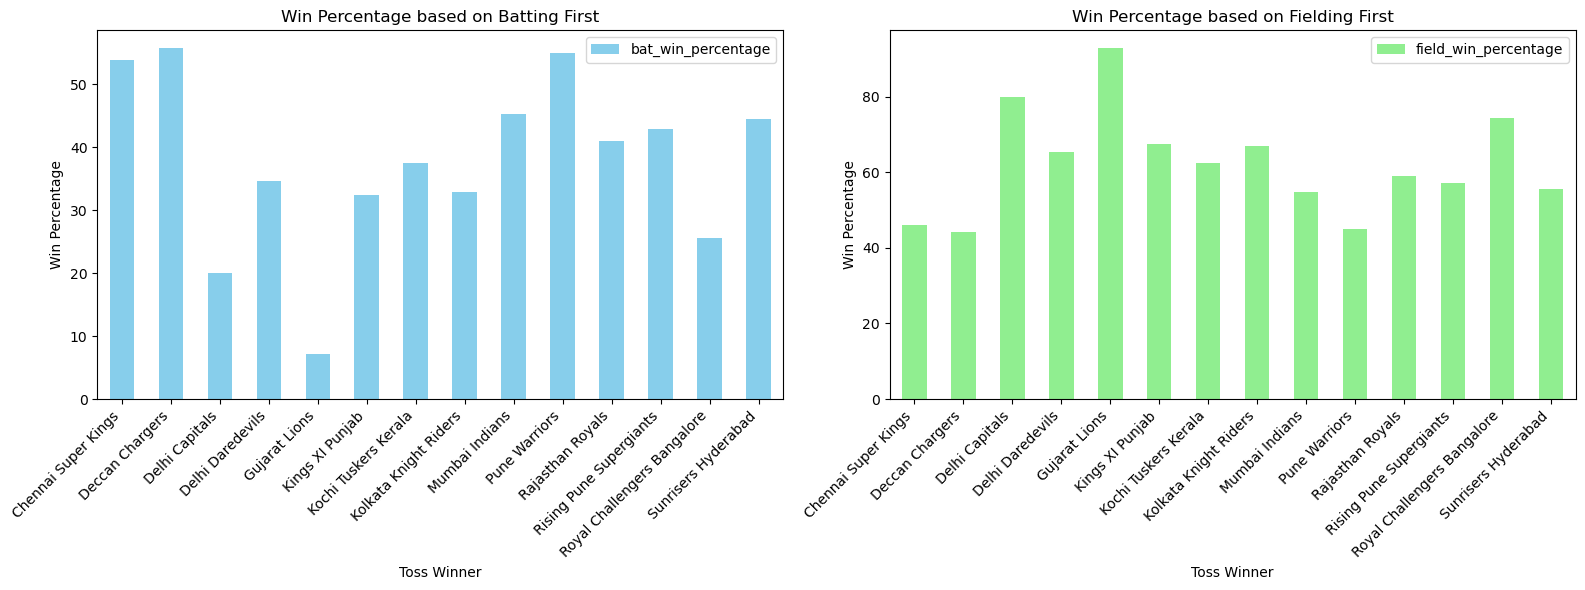

In [22]:
toss_decision_analysis = match.groupby(['toss_winner', 'toss_decision'])['winner'].count().unstack()
toss_decision_analysis['total'] = toss_decision_analysis['bat'] + toss_decision_analysis['field']
toss_decision_analysis['bat_win_percentage'] = (toss_decision_analysis['bat'] / toss_decision_analysis['total']) * 100
toss_decision_analysis['field_win_percentage'] = (toss_decision_analysis['field'] / toss_decision_analysis['total']) * 100
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

toss_decision_analysis['bat_win_percentage'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Win Percentage based on Batting First')
axes[0].set_xlabel('Toss Winner')
axes[0].set_ylabel('Win Percentage')
axes[0].set_xticklabels(toss_decision_analysis.index, rotation=45, ha='right') 
axes[0].legend().set_title('')

toss_decision_analysis['field_win_percentage'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Win Percentage based on Fielding First')
axes[1].set_xlabel('Toss Winner')
axes[1].set_ylabel('Win Percentage')
axes[1].set_xticklabels(toss_decision_analysis.index, rotation=45, ha='right')
axes[1].legend().set_title('')

plt.tight_layout()
plt.show()


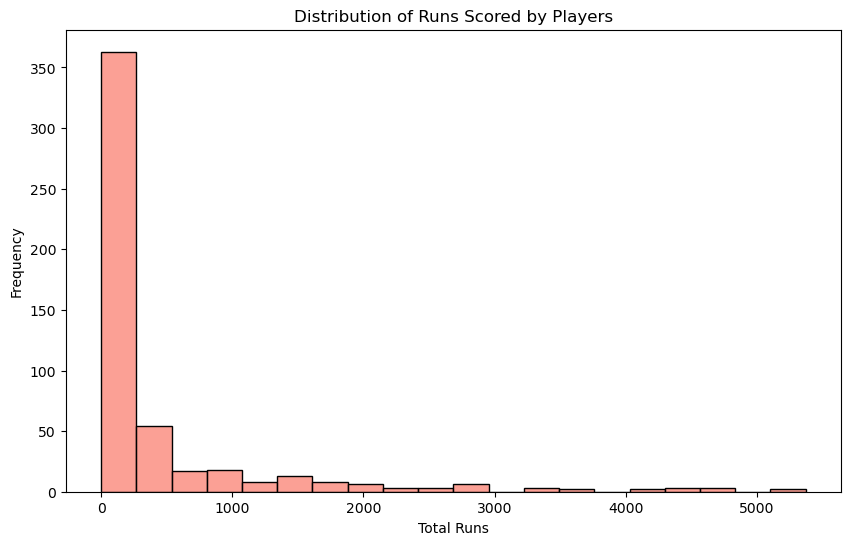

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(delivery.groupby('batsman')['batsman_runs'].sum(),bins=20, color='salmon')
plt.title('Distribution of Runs Scored by Players')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

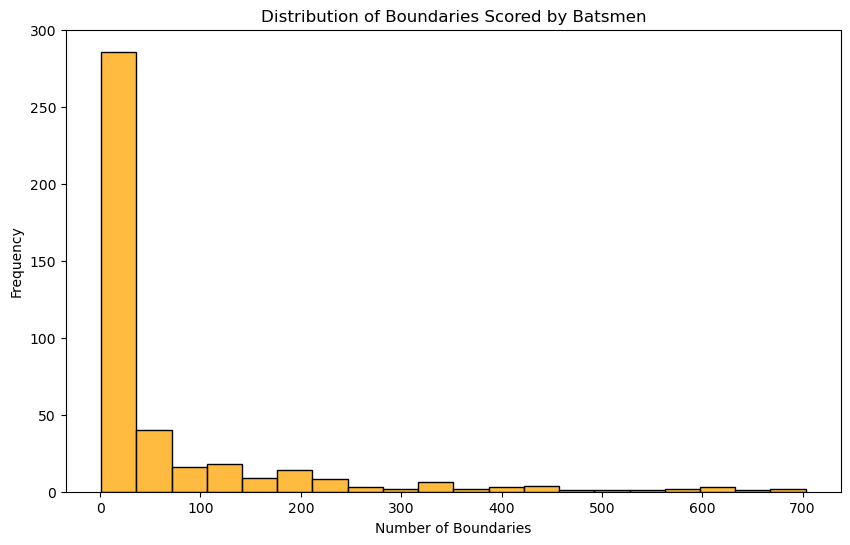

In [24]:
boundary_counts = delivery[delivery['batsman_runs'].isin([4, 6])].groupby('batsman')['batsman_runs'].count()

plt.figure(figsize=(10, 6))
sns.histplot(boundary_counts, bins=20, color='orange')
plt.title('Distribution of Boundaries Scored by Batsmen')
plt.xlabel('Number of Boundaries')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2816\2365762234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='dismissal_kind', data=delivery, order=delivery['dismissal_kind'].value_counts().index, palette='husl')


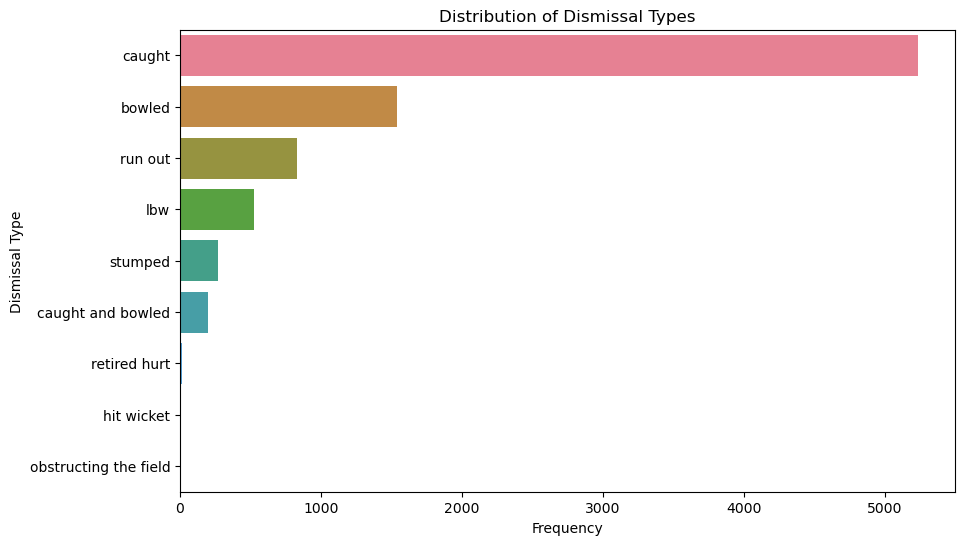

In [25]:

plt.figure(figsize=(10, 6))
sns.countplot(y='dismissal_kind', data=delivery, order=delivery['dismissal_kind'].value_counts().index, palette='husl')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

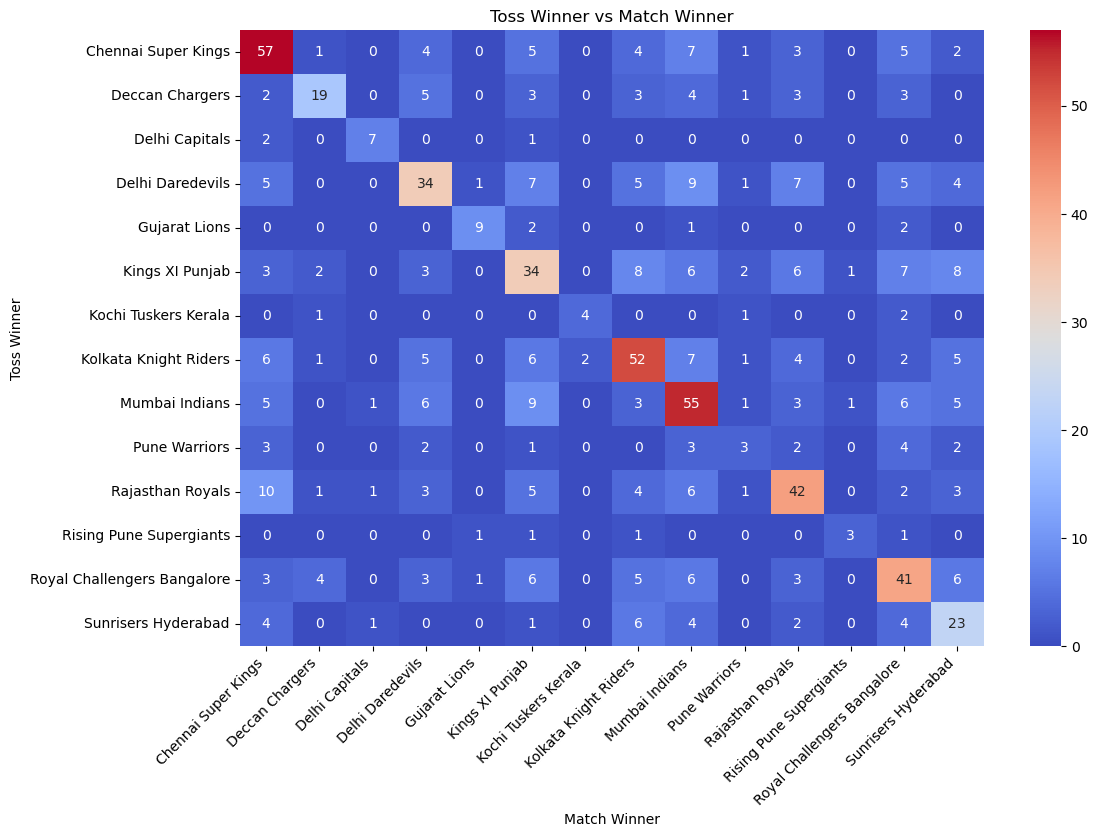

In [26]:
contingency_table = pd.crosstab(match['toss_winner'], match['winner'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Match Winner')
plt.ylabel('Toss Winner')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.show()

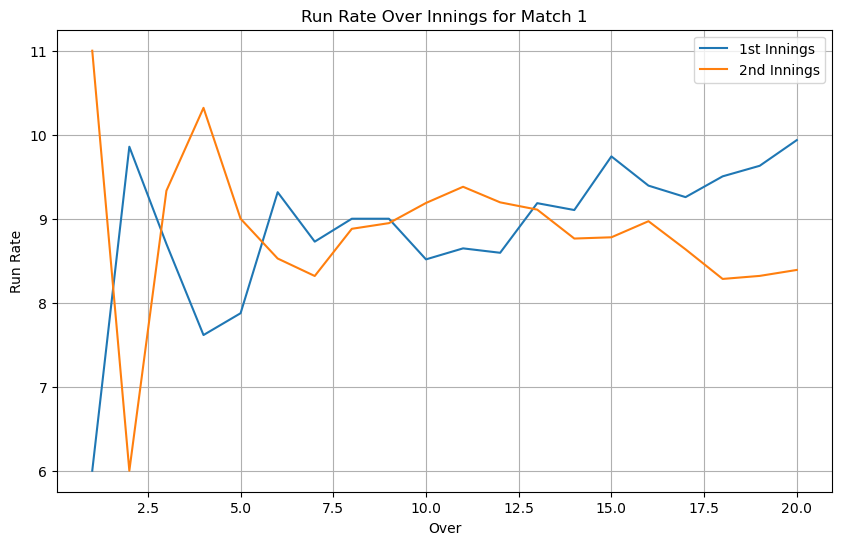

In [27]:
specific_match = delivery[delivery['match_id'] == 1]

runs_per_over = specific_match.groupby(['inning', 'over'])['total_runs'].sum().unstack()

cumulative_runs_per_over = runs_per_over.cumsum(axis=1)

balls_per_over = specific_match.groupby(['inning', 'over'])['ball'].count().unstack()

cumulative_balls_per_over = balls_per_over.cumsum(axis=1)

run_rate = cumulative_runs_per_over.divide(cumulative_balls_per_over, axis=1) * 6

plt.figure(figsize=(10, 6))
plt.plot(run_rate.iloc[0], label='1st Innings')
plt.plot(run_rate.iloc[1], label='2nd Innings')
plt.title('Run Rate Over Innings for Match 1')
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Gujarat Lions',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [29]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [30]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [31]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [32]:
match_df.shape

(641, 20)

In [33]:
match_df = match_df[match_df['dl_applied'] == 0]

In [34]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [35]:
delivery_df = match_df.merge(delivery,on='match_id')

In [36]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [37]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [38]:
print(delivery_df['total_runs_y'].dtype)

delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

delivery_df = delivery_df.dropna(subset=['total_runs_y'])

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df['total_runs_y']

int64


125       1
126       0
127       0
128       2
129       4
         ..
149573    1
149574    2
149575    1
149576    2
149577    0
Name: total_runs_y, Length: 72413, dtype: int64

In [39]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [40]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [41]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [42]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == "0" else 1)

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

delivery_df['wickets'] = 10 - wickets
print(delivery_df.head())

     match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...     

In [43]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [44]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [45]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [46]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [47]:
delivery_df['result'] = delivery_df.apply(result,axis=1)
delivery_df['result']

125       0
126       0
127       0
128       0
129       0
         ..
149573    0
149574    0
149575    0
149576    0
149577    0
Name: result, Length: 72413, dtype: int64

In [48]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [49]:
final_df = final_df.sample(final_df.shape[0])

In [50]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
53718,Deccan Chargers,Kolkata Knight Riders,Hyderabad,160,109,10,169,4.909091,8.807339,0


In [51]:
final_df.dropna(inplace=True)

In [52]:
final_df = final_df[final_df['balls_left'] != 0]

In [53]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [54]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
38379,Rajasthan Royals,Deccan Chargers,Ahmedabad,47,51,8,148,8.782609,5.529412
27676,Kings XI Punjab,Deccan Chargers,Kimberley,50,31,5,168,7.955056,9.677419
96191,Delhi Daredevils,Rajasthan Royals,Ahmedabad,74,5,1,201,6.626087,88.800000
87472,Rajasthan Royals,Sunrisers Hyderabad,Abu Dhabi,97,78,7,133,5.142857,7.461538
93717,Rajasthan Royals,Sunrisers Hyderabad,Ahmedabad,55,34,5,134,5.511628,9.705882
...,...,...,...,...,...,...,...,...,...
145884,Chennai Super Kings,Mumbai Indians,Chennai,89,49,4,159,5.915493,10.897959
143024,Rajasthan Royals,Kings XI Punjab,Mohali,20,6,4,190,8.947368,20.000000
84947,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,99,79,10,136,5.414634,7.518987
110319,Mumbai Indians,Chennai Super Kings,Chennai,157,118,10,158,3.000000,7.983051


In [55]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [56]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [57]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [58]:
y_pred = pipe.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred)

0.7950802438853458

In [60]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8007269894846164


In [61]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8083879423328965


In [62]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [63]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.9,44.1
10467,2,8,0,50.7,49.3
10473,3,1,0,57.4,42.6
10479,4,7,1,69.1,30.9
10485,5,12,0,59.0,41.0
10491,6,13,0,46.7,53.3
10497,7,9,0,40.8,59.2
10505,8,15,0,27.1,72.9
10511,9,7,0,25.0,75.0
10518,10,17,0,13.6,86.4


Text(0.5, 1.0, 'Target-178')

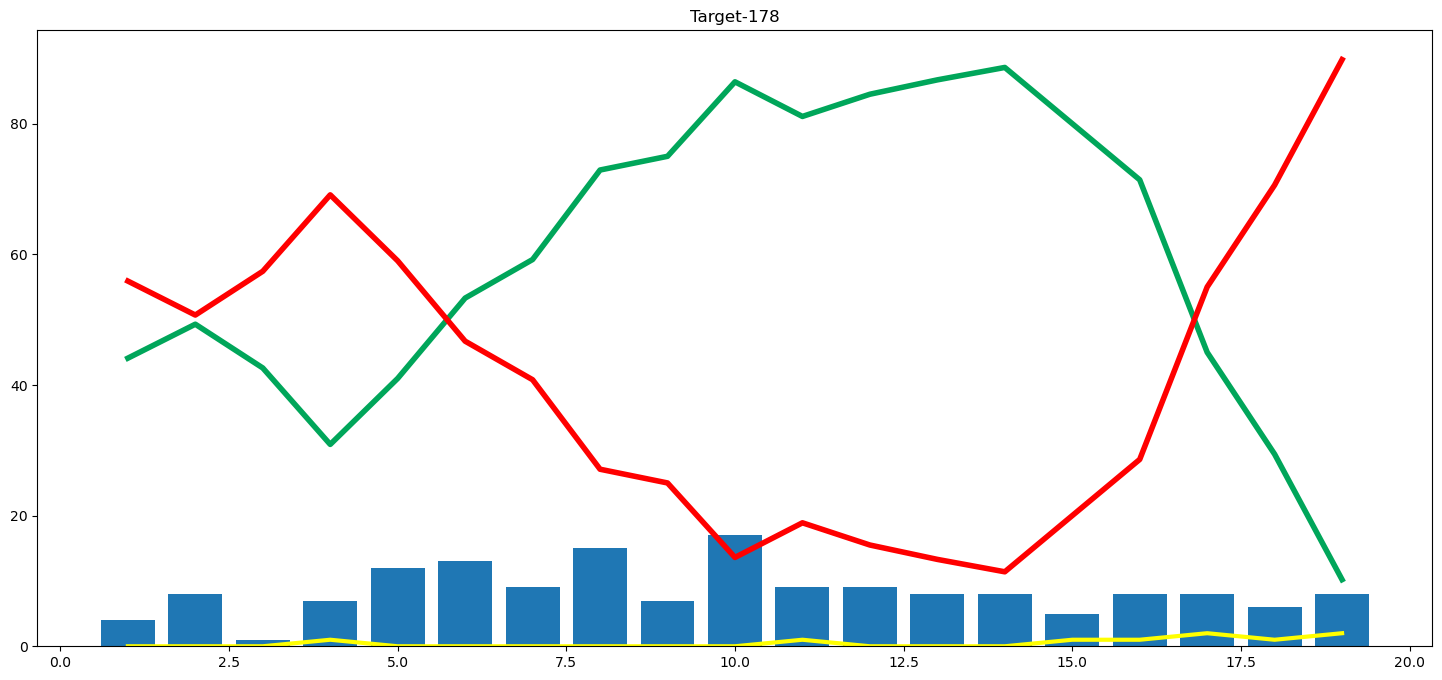

In [64]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [65]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [66]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
         'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings',
         'Rajasthan Royals', 'Delhi Capitals']

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
          'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
          'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
          'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
          'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
          'Sharjah', 'Mohali', 'Bengaluru']

batting_team = input('Select the batting team: ')
bowling_team = input('Select the bowling team: ')
selected_city = input('Select host city: ')
target = int(input('Target: '))
score = int(input('Score: '))
overs = float(input('Overs completed: '))
wickets = int(input('Wickets out: '))

runs_left = target - score
balls_left = 120 - (overs * 6)
wickets = 10 - wickets
crr = score / overs
rrr = (runs_left * 6) / balls_left

input_df = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team],
                         'city': [selected_city], 'runs_left': [runs_left],
                         'balls_left': [balls_left], 'wickets': [wickets],
                         'total_runs_x': [target], 'crr': [crr], 'rrr': [rrr]})

result = pipe.predict_proba(input_df)
loss = result[0][0]
win = result[0][1]

print(f"{batting_team} - {round(win * 100)}%")
print(f"{bowling_team} - {round(loss * 100)}%")